# Import Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis

In [32]:
#!pip install factor-analyzer

In [24]:
from factor_analyzer import FactorAnalyzer
# Module for adequacy test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# Get Data

In [11]:
#Import Columns you need
cols = ['snap_pc',
        'poverty_pop_pc',
        'precipitation',
        'lib_card_pc',
        'aqi',
        'elec_rate',
        'uvi',
        'avail_yard_sq_mi',
        'benz_dose_pc',
        'farm_market_pc',
        'lib_ct_pc',
        'broad_un_sq_mi']

data = pd.read_excel('C:\\Users\\artif\\OneDrive\\Desktop\\UN Datathon\\Factor Analysis Data.xlsx', usecols=cols)

In [5]:
data

,snap_pc,poverty_pop_pc,precipitation,lib_card_pc,aqi,broad_un_sq_mi,elec_rate,uvi,avail_yard_sq_mi,benz_dose_pc,farm_market_pc
0,0.110729,0.117,38.33,0.325718,263,258,0.135935,3892,0.000289,11.8,0.000010
1,0.181757,0.178,41.82,0.579927,178,453,0.176708,3704,0.000301,11.6,0.000021
2,0.134050,0.182,49.60,0.389962,240,376,0.126281,3770,0.000302,13.0,0.000015
3,0.110010,0.117,44.81,1.029558,273,79,0.145779,3981,0.000289,18.6,0.000013
4,0.192547,0.152,47.03,0.653818,241,157,0.154299,3902,0.000299,17.0,0.000007
5,0.070080,0.088,48.51,0.588881,273,71,0.110446,3971,0.000284,15.1,0.000009
6,0.162253,0.157,46.38,0.652148,40,348,0.147916,3727,0.000305,19.2,0.000010
7,0.166016,0.164,40.92,1.024581,244,37,0.139900,3741,0.000297,9.5,0.000011
8,0.042559,0.051,43.10,0.386589,237,160,0.215961,3837,0.000266,8.0,0.000015
9,0.131673,0.108,32.99,0.514986,274,124,0.115683,3805,0.000302,16.3,0.000000


In [33]:
#Create dataframe in pandas
df = pd.DataFrame(data)

# Scale Data and Perform Factor Analysis

In [13]:
# Scaling data
X = data.to_numpy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Create a FactorAnalysis object and fit it to our data
fa = FactorAnalysis(n_components=2, rotation='varimax')
fa.fit(X_scaled)

FactorAnalysis(n_components=2, rotation='varimax')

In [31]:
print(fa.components_)

[[ 0.9799627   0.84107613  0.05915101  0.0986923   0.27057494  0.04139984
   0.16779721 -0.1662277  -0.08332403  0.44107361  0.65163556  0.16396332]
 [ 0.12833759 -0.05746682  0.06571862 -0.57486242  0.52022721 -0.53816182
   0.94822713  0.23453213 -0.09105819  0.20436835  0.28230742  0.03506963]]


# Visualize Relationship

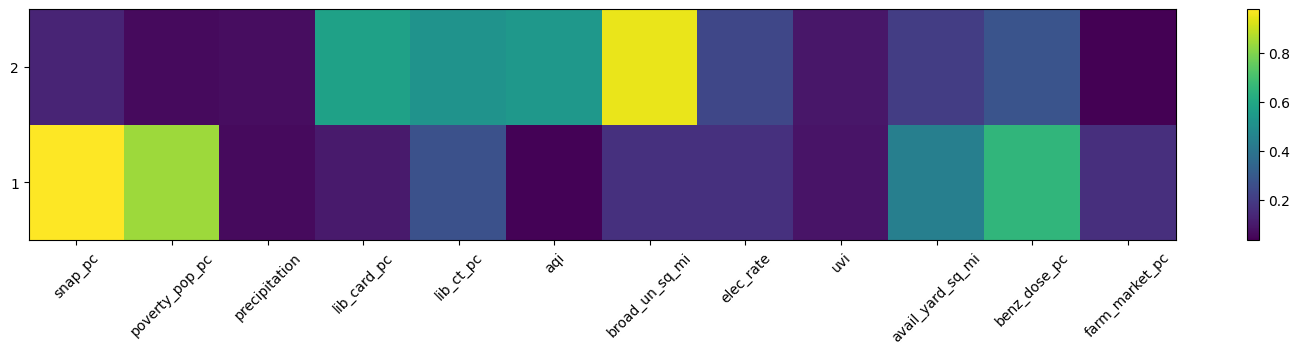

In [15]:
# Plot
Z=np.abs(fa.components_)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)

fig.set_size_inches(18.5, 3)
fig.set_dpi(100)

ax.set_yticks(np.arange(fa.components_.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(fa.components_.shape[1])+0.5, minor=False)
ax.set_yticklabels(np.arange(fa.components_.shape[0])+1)
ax.set_xticklabels(list(data), rotation = 45)
plt.show()

### Analysis: Factor 1 is linked to SNAP usage, poverty levels, depression, and to a lesser extent available yard space. For this reason, we labelled Factor 1 as "Socioeconomic Status". Factor 2 is linked to areas without broadband internet and library card holders. For this reason, we labelled Factor 2 as "Digital and Education Connectivity". 

In factor analysis, Factor 1 and Factor 2 represent latent variables that explain the underlying structure of your data. These factors are not directly observed but are derived from the correlations between the observed variables (data columns). To interpret what Factor 1 and Factor 2 represent, you need to analyze the factor loadings, which indicate how strongly each observed variable is associated with each factor.

Here's how you can interpret Factor 1 and Factor 2:

Examine the Factor Loadings: Factor loadings are the coefficients that describe the relationship between the observed variables and the latent factors. These loadings show how much each observed variable contributes to each factor. Factor loadings are typically presented in a matrix, with rows representing observed variables and columns representing factors.

High Loadings: Look for observed variables with high positive or negative loadings on Factor 1 and Factor 2. High positive loadings suggest a strong positive relationship between the variable and the factor, while high negative loadings indicate a strong negative relationship.

Groupings of Variables: Observe which variables tend to load together on Factor 1 and Factor 2. If several variables have high loadings on Factor 1 and not on Factor 2 (or vice versa), it suggests that Factor 1 and Factor 2 represent distinct underlying concepts or constructs.

Label Factors: Based on the patterns of loadings, you can give Factor 1 and Factor 2 meaningful labels that reflect the underlying concepts they represent. For example, if variables related to income, education, and job status load highly on Factor 1, you might label it "Socioeconomic Status." Similarly, if variables related to health behaviors load highly on Factor 2, you could label it "Health Habits."

(Credit: Explanation for how to interpret provided by ChatGPT)

# Print the Factor Scores for each Lever

In [16]:
# Print the factor scores for each row (county). 
# Read each of these as "Factor 1 (column one) is very (or not) influential in this county" 
print(fa.transform(X_scaled))

[[-0.28335531  0.27153794]
 [ 0.97852779  1.3659274 ]
 [ 0.18743901  1.06227571]
 [-0.07511615 -1.21358848]
 [ 1.38819784 -0.72210175]
 [-0.89075625 -0.96590711]
 [ 0.69657657  0.79125406]
 [ 1.0188538  -1.6118519 ]
 [-1.61090087 -0.20426876]
 [ 0.23251867 -0.67472844]
 [-0.41710172  0.19184236]
 [-0.036839   -1.25883021]
 [-1.70821575 -0.10565866]
 [-0.89603777  0.22502603]
 [ 0.08860594 -1.32049686]
 [-1.10851627  1.47252745]
 [-0.89552841 -1.01737775]
 [-0.09358172  0.66950651]
 [-0.31227439 -0.3680886 ]
 [ 0.88028915 -0.80953081]
 [ 1.7006007  -0.97361453]
 [ 1.15168519  0.39779988]
 [-0.96047053 -0.67959139]
 [-0.29204726  0.07987546]
 [ 0.23096313 -0.75889828]
 [ 1.30112943  1.66941781]
 [-0.56902526 -0.66943246]
 [ 0.36795357 -0.14993314]
 [ 1.16052616  1.49698085]
 [ 2.61548118  0.46946221]
 [-0.01912558 -0.00633216]
 [ 0.48047672 -1.44830705]
 [ 0.22050504  0.03734496]
 [ 0.30024213  1.61309243]
 [-1.47376672  0.94661592]
 [-1.62412844 -0.44785507]
 [-0.83947125  0.79191345]
 

Credit: Arthur Mello, https://levelup.gitconnected.com/factor-analysis-for-marketing-with-python-f51fbf460c30